### Imports and data prep

In [13]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [14]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True


In [15]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt  # for root mean-squared error calculation
from sklearn.model_selection import cross_val_score

In [16]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

In [17]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [18]:
#Imports for building Model
from sklearn.model_selection import train_test_split

In [19]:
X = boston.iloc[:,1:-1] #independant variables
y = boston.iloc[:,-1] #response variable mv

In [20]:
#Split data to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Regression Models from Previous Analysis
Linear Regression <br>
Ridge Regression <br>
Lasso Regression <br>
Elastic Net Regression <br>

In [21]:
from sklearn.linear_model import LinearRegression
#using the log_mv value
boston['log_mv'] = np.log10(boston['mv'])
log_boston = boston.drop(columns = ['mv'])
X2 = log_boston.iloc[:,1:-1] #independant variables
y2 = log_boston.iloc[:,-1] #response variable log_mv

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3)

In [22]:
#Linear Regression Model
reg = LinearRegression() 
 
# Fitting data
reg.fit(X_train2, y_train2)
y_pred = reg.predict(X_test2)

#evaluating the model using RMSE
from sklearn.metrics import mean_absolute_error

rmse = sqrt(mean_absolute_error(y_pred, y_test2))
print('RMSE = ', rmse)

RMSE =  0.2543541086766587


In [23]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

X2 = log_boston.drop('log_mv',1)
y2 = log_boston['log_mv']

kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

def rmsle(y2, y_pred):

    return np.sqrt(mean_squared_error(y2, y_pred))

def cv_rmse(model, X=X):

    rmse = np.sqrt(-cross_val_score(model, X2, y2, scoring="neg_mean_squared_error", cv=kfolds))

    return (rmse)

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))

score = cv_rmse(ridge)

print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))#, datetime.now(), )

score = cv_rmse(lasso)

print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))#, datetime.now(), )

score = cv_rmse(elasticnet)

print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))#, datetime.now(), )

Ridge: 0.0854 (0.0045)

LASSO: 0.0832 (0.0032)

elastic net: 0.0833 (0.0031)



### Random Forest Regression

In [25]:
X = boston.iloc[:,1:-1] #independant variables
y = boston.iloc[:,-1] #response variable mv

#Split data to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:
# Fitting the Random Forest Regression to the dataset
#Model 1 n_estimators = 500
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.9985751812391213
R2_score (train):  0.9998854416193441
R2_score (test):  0.9996245530082962
RMSE:  0.0031455317863541086


In [28]:
#RF Model 2 n_estimators = 100
regressor_rf2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_rf2.fit(X_train, y_train.ravel())

# Predicting Cross Validation Score
cv_rf2 = cross_val_score(estimator = regressor_rf2, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf2_train = regressor_rf2.predict(X_train)
r2_score_rf2_train = r2_score(y_train, y_pred_rf2_train)

# Predicting R2 Score the Test set results
y_pred_rf2_test = regressor_rf2.predict(X_test)
r2_score_rf2_test = r2_score(y_test, y_pred_rf2_test)

# Predicting RMSE the Test set results
rmse_rf2 = (np.sqrt(mean_squared_error(y_test, y_pred_rf2_test)))
print('CV: ', cv_rf2.mean())
print('R2_score (train): ', r2_score_rf2_train)
print('R2_score (test): ', r2_score_rf2_test)
print("RMSE: ", rmse_rf2)

CV:  0.9985094127005112
R2_score (train):  0.9999035399640045
R2_score (test):  0.9996161328578809
RMSE:  0.003180608633448248


In [29]:
#RF Model 3 n_estimators = 200
regressor_rf3 = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor_rf3.fit(X_train, y_train.ravel())

# Predicting Cross Validation Score
cv_rf3 = cross_val_score(estimator = regressor_rf3, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf3_train = regressor_rf3.predict(X_train)
r2_score_rf3_train = r2_score(y_train, y_pred_rf3_train)

# Predicting R2 Score the Test set results
y_pred_rf3_test = regressor_rf3.predict(X_test)
r2_score_rf3_test = r2_score(y_test, y_pred_rf3_test)

# Predicting RMSE the Test set results
rmse_rf3 = (np.sqrt(mean_squared_error(y_test, y_pred_rf3_test)))
print('CV: ', cv_rf3.mean())
print('R2_score (train): ', r2_score_rf3_train)
print('R2_score (test): ', r2_score_rf3_test)
print("RMSE: ", rmse_rf3)

CV:  0.9984996551503821
R2_score (train):  0.9998950030519018
R2_score (test):  0.999627569605834
RMSE:  0.0031328696256627602


In [30]:
#RF Model 4 n_estimators = 300
regressor_rf4 = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor_rf4.fit(X_train, y_train.ravel())

# Predicting Cross Validation Score
cv_rf4 = cross_val_score(estimator = regressor_rf4, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf4_train = regressor_rf4.predict(X_train)
r2_score_rf4_train = r2_score(y_train, y_pred_rf4_train)

# Predicting R2 Score the Test set results
y_pred_rf4_test = regressor_rf4.predict(X_test)
r2_score_rf4_test = r2_score(y_test, y_pred_rf4_test)

# Predicting RMSE the Test set results
rmse_rf4 = (np.sqrt(mean_squared_error(y_test, y_pred_rf4_test)))
print('CV: ', cv_rf4.mean())
print('R2_score (train): ', r2_score_rf4_train)
print('R2_score (test): ', r2_score_rf4_test)
print("RMSE: ", rmse_rf4)

CV:  0.9985705148289726
R2_score (train):  0.9998952100126589
R2_score (test):  0.999626227146808
RMSE:  0.0031385109025110934


### With Boosting

In [31]:
#Removes warnings from AdaBoost Future
import warnings
warnings.filterwarnings('ignore')
#ADA Boost
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(
 RandomForestRegressor(max_depth=4),n_estimators=500)

ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=None)

In [32]:
#Prediction for ADA Boost
adapred = ada_clf.predict(X_test)


In [33]:
# Predicting Cross Validation Score
cv_ada = cross_val_score(estimator = ada_clf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_ada_train = ada_clf.predict(X_train)
r2_score_ada_train = r2_score(y_train, y_pred_ada_train)

# Predicting R2 Score the Test set results
y_pred_ada_test = ada_clf.predict(X_test)
r2_score_ada_test = r2_score(y_test, y_pred_ada_test)

# Predicting RMSE the Test set results
rmse_ada = (np.sqrt(mean_squared_error(y_test, y_pred_ada_test)))
print('CV: ', cv_ada.mean())
print('R2_score (train): ', r2_score_ada_train)
print('R2_score (test): ', r2_score_ada_test)
print("RMSE: ", rmse_ada)

CV:  0.9988100916619411
R2_score (train):  0.9998643388498313
R2_score (test):  0.9997361805577654
RMSE:  0.002636775548270784


In [34]:
#Gradient Boosting model 1
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=500, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
# Predicting Cross Validation Score
cv_gbrt = cross_val_score(estimator = gbrt, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_gbrt_train = gbrt.predict(X_train)
r2_score_gbrt_train = r2_score(y_train, y_pred_gbrt_train)

# Predicting R2 Score the Test set results
y_pred_gbrt_test = gbrt.predict(X_test)
r2_score_gbrt_test = r2_score(y_test, y_pred_gbrt_test)

# Predicting RMSE the Test set results
rmse_gbrt = (np.sqrt(mean_squared_error(y_test, y_pred_gbrt_test)))
print('CV: ', cv_gbrt.mean())
print('R2_score (train): ', r2_score_gbrt_train)
print('R2_score (test): ', r2_score_gbrt_test)
print("RMSE: ", rmse_gbrt)

CV:  0.9920790413523155
R2_score (train):  0.9999970729387074
R2_score (test):  0.9929665635806629
RMSE:  0.013614558008778203


In [36]:
#Gradient boosting model 2
#finding the optimal number of trees
gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt2.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred)
 for y_pred in gbrt2.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)
gbrt2_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt2_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=74, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
# Predicting Cross Validation Score
cv_gbrt2 = cross_val_score(estimator = gbrt2, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_gbrt2_train = gbrt2.predict(X_train)
r2_score_gbrt2_train = r2_score(y_train, y_pred_gbrt2_train)

# Predicting R2 Score the Test set results
y_pred_gbrt2_test = gbrt2.predict(X_test)
r2_score_gbrt2_test = r2_score(y_test, y_pred_gbrt2_test)

# Predicting RMSE the Test set results
rmse_gbrt2 = (np.sqrt(mean_squared_error(y_test, y_pred_gbrt2_test)))
print('CV: ', cv_gbrt2.mean())
print('R2_score (train): ', r2_score_gbrt2_train)
print('R2_score (test): ', r2_score_gbrt2_test)
print("RMSE: ", rmse_gbrt2)

CV:  0.9988385421659765
R2_score (train):  0.9998072949207337
R2_score (test):  0.9994525270082444
RMSE:  0.0037984036390844296


### Comparing Models

In [38]:
models = [('Linear Regression', '0.248983'), #rmse_rf, r2_score_linear_train, r2_score_linear_test, cv_rf.mean()),
          ('Elastic Net Regression','0.0833'), #rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression','0.0854'),# rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression','0.0832'), #rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('GradientBoosting', rmse_gbrt, r2_score_gbrt_train, r2_score_gbrt_test, cv_gbrt.mean()),
          ('GradientBoosting_2', rmse_gbrt2, r2_score_gbrt2_train, r2_score_gbrt2_test, cv_gbrt2.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('Random Forest Regression_2', rmse_rf2, r2_score_rf2_train, r2_score_rf2_test, cv_rf2.mean()),
          ('Random Forest Regression_3', rmse_rf3, r2_score_rf3_train, r2_score_rf3_test, cv_rf3.mean()),
          ('Random Forest Regression_4', rmse_rf4, r2_score_rf4_train, r2_score_rf4_test, cv_rf4.mean()),
          ('ADABoosting', rmse_ada, r2_score_ada_train, r2_score_ada_test, cv_ada.mean())   
         ]

In [39]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.248983,NaN,NaN,NaN
1,Elastic Net Regression,0.0833,NaN,NaN,NaN
2,Ridge Regression,0.0854,NaN,NaN,NaN
3,Lasso Regression,0.0832,NaN,NaN,NaN
4,GradientBoosting,0.0136146,0.999997,0.992967,0.992079
5,GradientBoosting_2,0.0037984,0.999807,0.999453,0.998839
6,Random Forest Regression,0.00314553,0.999885,0.999625,0.998575
7,Random Forest Regression_2,0.00318061,0.999904,0.999616,0.998509
8,Random Forest Regression_3,0.00313287,0.999895,0.999628,0.998500
9,Random Forest Regression_4,0.00313851,0.999895,0.999626,0.998571


In [ ]:
###try using fewer trees to compare as well 50 or 75###

### Feature Importance

In [40]:
#Measuring which Variables are most important for RF_1
importances = regressor_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

1. feature 11 (0.998867)
2. feature 6 (0.000375)
3. feature 4 (0.000284)
4. feature 5 (0.000169)
5. feature 10 (0.000107)
6. feature 9 (0.000057)
7. feature 3 (0.000049)
8. feature 8 (0.000029)
9. feature 1 (0.000027)
10. feature 7 (0.000023)
11. feature 0 (0.000012)
12. feature 2 (0.000001)


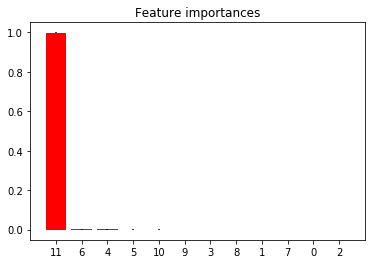

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

1. feature 11 (0.998643)
2. feature 4 (0.000511)
3. feature 6 (0.000351)
4. feature 5 (0.000149)
5. feature 10 (0.000136)
6. feature 3 (0.000085)
7. feature 9 (0.000037)
8. feature 8 (0.000032)
9. feature 1 (0.000029)
10. feature 7 (0.000016)
11. feature 0 (0.000011)
12. feature 2 (0.000001)


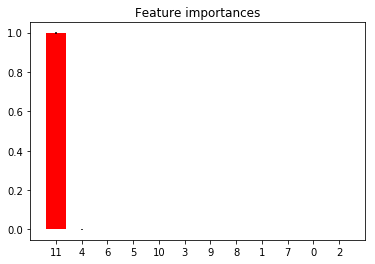

In [42]:
#regressor_rf2
importances = regressor_rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor_rf2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

1. feature 11 (0.998589)
2. feature 6 (0.000744)
3. feature 5 (0.000358)
4. feature 4 (0.000226)
5. feature 10 (0.000032)
6. feature 3 (0.000014)
7. feature 7 (0.000013)
8. feature 9 (0.000010)
9. feature 8 (0.000006)
10. feature 1 (0.000005)
11. feature 0 (0.000002)
12. feature 2 (0.000000)


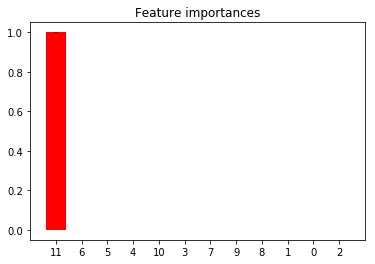

In [43]:
#ada_clf
importances = ada_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in ada_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#Feature 11: lstat Percentage of population of lower socio-economic status is the highest indicator of home value for all models it appears
